## 1. Downloading and getting dataset from kaggle

In [153]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [154]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [155]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command
%pwd

/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

## 2. Reading and exploring dataset

In [156]:
!ls

confusion_matrix_dcnn.png  mma-facial-expression.zip  performance_dist.png
epoch_history_dcnn.png	   MMAFEDB		      weights521.h5
fer2013.csv		   model521.json	      weightsfinal.h5
fer2013csv.zip		   modelfinal.json
kaggle.json		   model.json


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('fer2013.csv')
print(df.head())
print("shape= ",df.shape)

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
shape=  (35887, 3)


In [159]:
print("Data usage: \n",df.Usage.value_counts())

Data usage: 
 Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64


In [160]:
print('sample per emotion: ')
print(df.emotion.value_counts())

sample per emotion: 
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [161]:
options = ['3','4','6']
df = df[df['emotion'].isin(options)]
print('new sample per emotion: ')
print(df.emotion.value_counts())

new sample per emotion: 
3    8989
6    6198
4    6077
Name: emotion, dtype: int64


In [162]:
print('Number of pixels for a sample:')
print(len(df.pixels[3].split(' ')))

Number of pixels for a sample:
2304


In [163]:
emotion_labels = ["Happy", "Sad", "Neutral"]
num_classes = len(emotion_labels)
num_classes

3

Sad


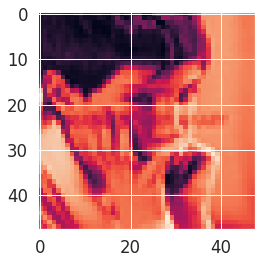

In [164]:
# visualize using the pixel entry
sample_number = 3

import matplotlib.pyplot as plt

array = np.mat(df.pixels[sample_number]).reshape(48,48)
plt.imshow(array)
d = {3:"Happy", 4:"Sad", 6:"Neutral"}
print(d[df.emotion[sample_number]])

## 3. Preprocessing data

In [165]:
train_set = df[(df.Usage == 'Training')]
validation_set = df[(df.Usage == 'PublicTest')]
test_set = df[(df.Usage == 'PrivateTest')]
train_set.shape,validation_set.shape,test_set.shape

((17010, 3), (2155, 3), (2099, 3))

In [166]:
train_set.shape,validation_set.shape,test_set.shape

((17010, 3), (2155, 3), (2099, 3))

In [167]:
emotion_labels = [ "Happy", "Sad", "Neutral"]
num_classes = len(emotion_labels)

In [168]:
from math import sqrt
depth = 1
height = int(sqrt(len(df.pixels[3].split())))
width = height

In [169]:
num_train = train_set.shape[0]
num_test = test_set.shape[0]
num_valid = validation_set.shape[0]

In [170]:
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32)
X_validation = np.array(list(map(str.split, validation_set.pixels)), np.float32)
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32)

num_train = X_train.shape[0]
num_validation = X_validation.shape[0]
num_test = X_test.shape[0]

X_train = X_train.reshape(num_train, width, height, depth)
X_validation = X_validation.reshape(num_valid, width, height, depth)
X_test = X_test.reshape(num_test, width, height, depth)

print('Training: ',X_train.shape)
print('Validation: ',X_validation.shape)
print('Test: ',X_test.shape)

Training:  (17010, 48, 48, 1)
Validation:  (2155, 48, 48, 1)
Test:  (2099, 48, 48, 1)


In [171]:
# replacing emotion in df from 3,4,6 to 0,1,2
train_set['emotion'].replace(to_replace=[3,4,6], value=[0,1,2],inplace=True)
test_set['emotion'].replace(to_replace=[3,4,6], value=[0,1,2],inplace=True)
validation_set['emotion'].replace(to_replace=[3,4,6], value=[0,1,2],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [172]:
# one hot encoding the seven emotions 
from keras.utils import np_utils

y_train = train_set.emotion

y_train = np_utils.to_categorical(y_train, 3)

y_validation = validation_set.emotion
y_validation = np_utils.to_categorical(y_validation, 3)

y_test = test_set.emotion
y_test = np_utils.to_categorical(y_test, 3)

print('Training: ',y_train.shape)
print('Validation: ',y_validation.shape)
print('Test: ',y_test.shape)

Training:  (17010, 3)
Validation:  (2155, 3)
Test:  (2099, 3)


In [173]:
np.unique(train_set.emotion)

array([0, 1, 2])

In [174]:
y_train[0]

array([0., 1., 0.], dtype=float32)

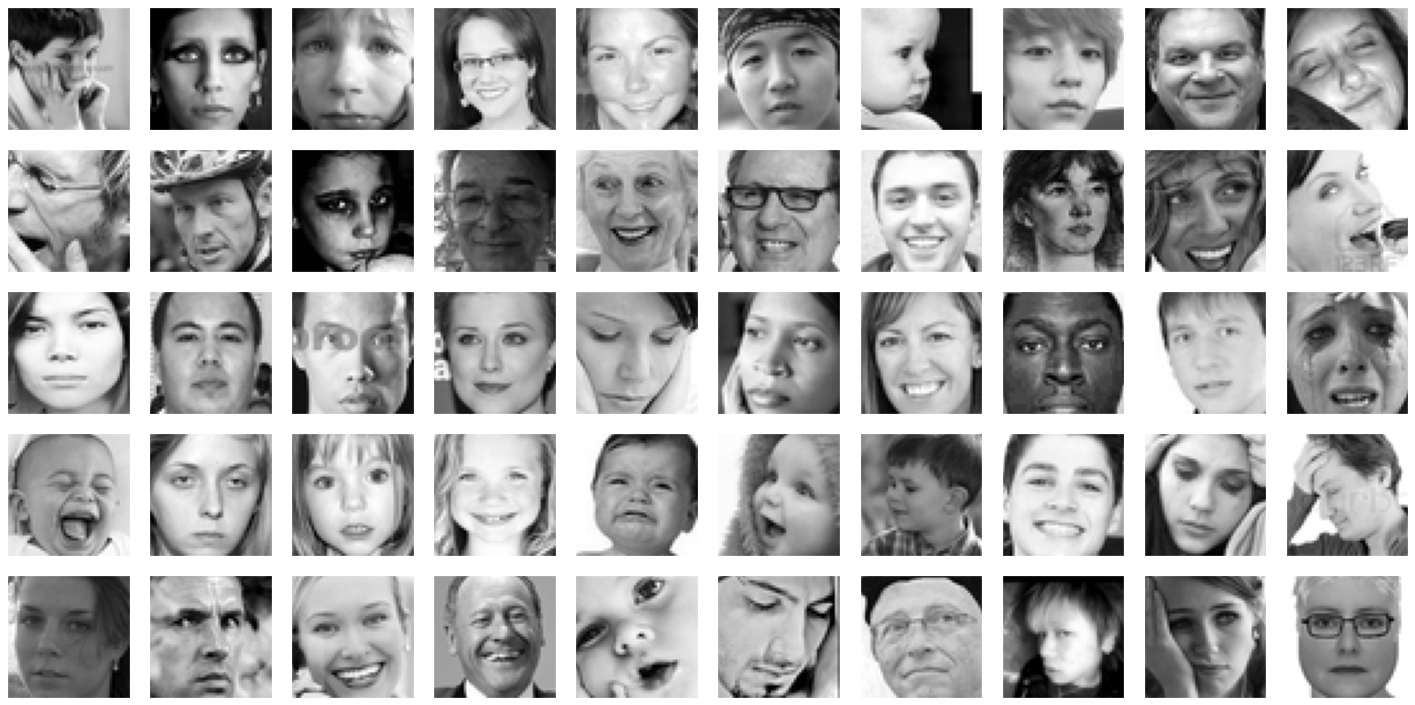

In [175]:
import matplotlib
import matplotlib.pyplot as plt

def overview(start, end, X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(10,10,i+1)
        ax.imshow(input_img[0,:,:,0],cmap=matplotlib.cm.gray )
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,50, X_train)

## 4. Building Neural Networks

In [176]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(3))
model.add(Activation('softmax'))


In [177]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 48, 48, 64)        12352     
_________________________________________________________________
batch_normalization_18 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_21 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 128)      

## 5. Training the model

In [178]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,   # randomly flip images
    )


datagen.fit(X_train)
datagen.fit(X_validation)

In [179]:
batch_size = 32
num_epochs = 50

In [180]:
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
# # callbackfunction

# callbacks =[early_stopping,lr_scheduler]


In [181]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
callbacks =[early_stopping,lr_scheduler]


In [182]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [183]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size)
validation_flow = datagen.flow(X_validation, y_validation)

In [184]:
history = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=validation_flow, 
                    validation_steps=len(X_validation) / batch_size,
                    callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
531/531 [==============================] - 16s 26ms/step - loss: 1.1516 - acc: 0.4472 - val_loss: 1.1919 - val_acc: 0.4552
Epoch 2/50
531/531 [==============================] - 13s 24ms/step - loss: 0.8228 - acc: 0.6161 - val_loss: 0.8092 - val_acc: 0.6139
Epoch 3/50
531/531 [==============================] - 13s 24ms/step - loss: 0.7249 - acc: 0.6704 - val_loss: 0.7993 - val_acc: 0.5865
Epoch 4/50
531/531 [==============================] - 13s 24ms/step - loss: 0.6974 - acc: 0.6881 - val_loss: 0.6904 - val_acc: 0.6835
Epoch 5/50
531/531 [==============================] - 13s 24ms/step - loss: 0.6494 - acc: 0.7173 - val_loss: 0.6894 - val_acc: 0.6896
Epoch 6/50
531/531 [==============================] - 13s 24ms/step - loss: 0.6474 - acc: 0.7153 - val_loss: 0.8606 - val_acc: 0.6232
Epoch 7/50
531/531 [==============================] - 13s 24ms/step - loss: 0.6250 - acc: 0.7241 - val_loss: 0.6790 - val_acc: 0.6803
Epoch 8/50
531/531 [==============================] - 13s 24ms

## 6. Evaluation

In [189]:
score = model.evaluate(X_test, y_test, steps=len(X_test) / batch_size)
print('Evaluation loss: ', score[0])
print('Evaluation accuracy: ', score[1])

65/65 [==============================] - 1s 10ms/step - loss: 0.5690 - acc: 0.7913
Evaluation loss:  0.5689619779586792
Evaluation accuracy:  0.7913292050361633


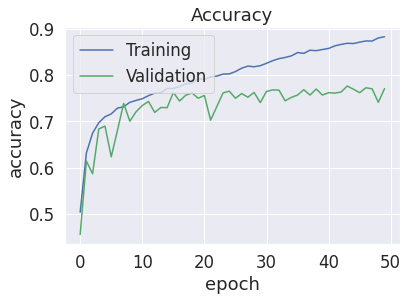

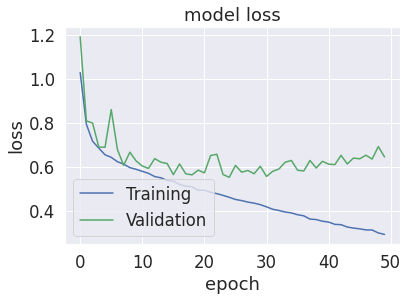

In [190]:
# summarize history for accuracy
plt.plot(history.history['acc'], color='b', label='Training')
plt.plot(history.history['val_acc'], color='g', label='Validation')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], color='g', label='Validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower left')
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[Text(58.5, 0.5, 'True label'), Text(0.5, 58.5, 'Predicted label')]

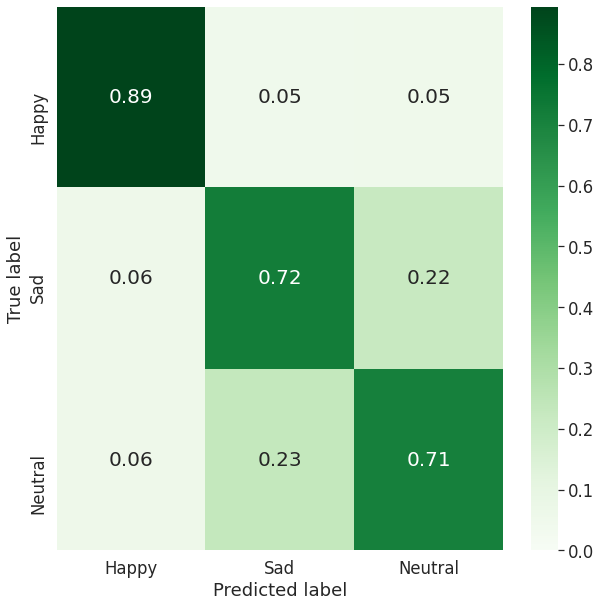

In [191]:
y_pred = model.predict_classes(X_test)
y_true = np.asarray([np.argmax(i) for i in y_test])

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False, 
                    cmap="Greens", yticklabels=emotion_labels, xticklabels=emotion_labels, vmin=0, vmax=np.max(cm_normalised), 
                    fmt=".2f", annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')

## 7. Saving the model

In [192]:
model_json = model.to_json()
with open("model554.json","w") as json_file:
     json_file.write(model_json)

model.save('weights554.h5')